In [1]:
from models import model, train_model
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
import numpy as np
from torchvision.transforms import RandomErasing,Compose
np.random.seed(0)
from torchmetrics import Accuracy
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch

In [2]:
resnet101 = model.Model(resnet101(ResNet101_Weights.IMAGENET1K_V2).to('cuda'))


e:\Anaconda\envs\Babylon\Lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [3]:
data = ImageFolder('data_retrieval/data_full', Compose([ResNet101_Weights.IMAGENET1K_V2.transforms(),RandomErasing(p=1, scale=(0.5,0.5))]))

In [4]:
targets = data.targets
train_indices, test_val_indices = train_test_split(np.arange(len(targets)), stratify=targets, train_size=0.65, random_state=21)
train_data = Subset(data, indices=train_indices)
val_test_data = Subset(data, indices=test_val_indices)
targets = np.array(targets)
test_val_targets = targets[test_val_indices]
test_indices, val_indices = train_test_split(test_val_indices, stratify=test_val_targets, train_size=0.57, random_state=21)
val_data, test_data = Subset(data, indices=val_indices), Subset(data, indices=test_indices)

In [5]:
print("Length of train set:", len(train_data))
print("Length of val set:", len(val_data))
print("Length of test set:", len(test_data))

Length of train set: 14528
Length of val set: 3365
Length of test set: 4459


In [6]:
train_model.train_model(train_data,val_data , resnet101, f'models/models_weights/resnet101_fulldata_occlusion.pth', epochs=100)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 		 Training Loss: 3.161596435150911 		 Validation Loss: 2.681279917463872
Validation Loss Decreased(inf--->565.750063) 	 Saving The Model


  1%|          | 1/100 [05:48<9:35:17, 348.66s/it]

Epoch 2 		 Training Loss: 2.236136729234116 		 Validation Loss: 1.9967353925885747
Validation Loss Decreased(565.750063--->421.311168) 	 Saving The Model


  2%|▏         | 2/100 [13:09<10:58:28, 403.15s/it]

Epoch 3 		 Training Loss: 1.8215132660277615 		 Validation Loss: 1.7716394668506785
Validation Loss Decreased(421.311168--->373.815928) 	 Saving The Model


  3%|▎         | 3/100 [20:30<11:19:29, 420.31s/it]

Epoch 4 		 Training Loss: 1.577707866018039 		 Validation Loss: 1.6246817312534387
Validation Loss Decreased(373.815928--->342.807845) 	 Saving The Model


  4%|▍         | 4/100 [27:51<11:25:45, 428.60s/it]

Epoch 5 		 Training Loss: 1.4335581645829036 		 Validation Loss: 1.5969704841550492
Validation Loss Decreased(342.807845--->336.960772) 	 Saving The Model


  5%|▌         | 5/100 [35:12<11:25:36, 433.02s/it]

Epoch 6 		 Training Loss: 1.3111584564006276 		 Validation Loss: 1.495276375686953
Validation Loss Decreased(336.960772--->315.503315) 	 Saving The Model


  6%|▌         | 6/100 [42:33<11:22:19, 435.52s/it]

Epoch 7 		 Training Loss: 1.1769201365927242 		 Validation Loss: 1.43367782560005
Validation Loss Decreased(315.503315--->302.506021) 	 Saving The Model


  8%|▊         | 8/100 [59:05<12:02:00, 470.88s/it]

Epoch 8 		 Training Loss: 1.0923296251387586 		 Validation Loss: 1.442896911883241
Epoch 9 		 Training Loss: 0.9955072280528262 		 Validation Loss: 1.4113737344741821
Validation Loss Decreased(302.506021--->297.799858) 	 Saving The Model


  9%|▉         | 9/100 [1:07:48<12:18:47, 487.12s/it]

Epoch 10 		 Training Loss: 0.8993022706244748 		 Validation Loss: 1.4099436422094915
Validation Loss Decreased(297.799858--->297.498109) 	 Saving The Model


 10%|█         | 10/100 [1:16:31<12:27:08, 498.09s/it]

Epoch 11 		 Training Loss: 0.8000538501609528 		 Validation Loss: 1.3610744604849703
Validation Loss Decreased(297.498109--->287.186711) 	 Saving The Model


 12%|█▏        | 12/100 [1:33:55<12:28:38, 510.43s/it]

Epoch 12 		 Training Loss: 0.705083156308151 		 Validation Loss: 1.4020298394546689


 13%|█▎        | 13/100 [1:42:37<12:25:29, 514.14s/it]

Epoch 13 		 Training Loss: 0.609760636086309 		 Validation Loss: 1.3903512302168173


 14%|█▍        | 14/100 [1:51:20<12:20:42, 516.77s/it]

Epoch 14 		 Training Loss: 0.5333668031044599 		 Validation Loss: 1.4652652716467165


 15%|█▌        | 15/100 [2:00:03<12:14:34, 518.53s/it]

Epoch 15 		 Training Loss: 0.4524726665000296 		 Validation Loss: 1.4996731786931297


 16%|█▌        | 16/100 [2:08:45<12:07:23, 519.57s/it]

Epoch 16 		 Training Loss: 0.3988010447455923 		 Validation Loss: 1.4889890288854661


 17%|█▋        | 17/100 [2:17:27<12:00:01, 520.50s/it]

Epoch 17 		 Training Loss: 0.32963450202956335 		 Validation Loss: 1.6002761039406201


 18%|█▊        | 18/100 [2:26:10<11:52:03, 521.01s/it]

Epoch 18 		 Training Loss: 0.3069050097038009 		 Validation Loss: 1.6650977943057275


 19%|█▉        | 19/100 [2:34:52<11:43:52, 521.39s/it]

Epoch 19 		 Training Loss: 0.2710774281915556 		 Validation Loss: 1.658835299207136


 20%|██        | 20/100 [2:43:34<11:35:26, 521.59s/it]

Epoch 20 		 Training Loss: 0.24728069258115298 		 Validation Loss: 1.6700749135977848


 21%|██        | 21/100 [2:52:17<11:27:12, 521.93s/it]

Epoch 21 		 Training Loss: 0.2207622010197228 		 Validation Loss: 1.7255732712304988


 22%|██▏       | 22/100 [3:00:59<11:18:46, 522.14s/it]

Epoch 22 		 Training Loss: 0.19161545788963624 		 Validation Loss: 1.8078598978960119


 23%|██▎       | 23/100 [3:09:41<11:09:48, 521.93s/it]

Epoch 23 		 Training Loss: 0.18687277409506528 		 Validation Loss: 1.798718823923319


 24%|██▍       | 24/100 [3:18:23<11:01:24, 522.17s/it]

Epoch 24 		 Training Loss: 0.17337938788319252 		 Validation Loss: 1.8220150780056326


 25%|██▌       | 25/100 [3:27:06<10:52:55, 522.34s/it]

Epoch 25 		 Training Loss: 0.16561792832840283 		 Validation Loss: 1.8612904055706132


 26%|██▌       | 26/100 [3:35:48<10:44:11, 522.32s/it]

Epoch 26 		 Training Loss: 0.15545686237316061 		 Validation Loss: 1.872956663087646


 27%|██▋       | 27/100 [3:44:28<10:34:25, 521.44s/it]

Epoch 27 		 Training Loss: 0.14872586445232633 		 Validation Loss: 1.963991010782278


 28%|██▊       | 28/100 [3:53:10<10:25:55, 521.60s/it]

Epoch 28 		 Training Loss: 0.14309059810365185 		 Validation Loss: 2.0032562606425084


 29%|██▉       | 29/100 [4:01:51<10:17:17, 521.65s/it]

Epoch 29 		 Training Loss: 0.13669764828106126 		 Validation Loss: 1.884602216888943


 30%|███       | 30/100 [4:10:34<10:08:44, 521.78s/it]

Epoch 30 		 Training Loss: 0.12911467679026475 		 Validation Loss: 1.9761727505950566


 31%|███       | 31/100 [4:19:15<9:59:59, 521.73s/it] 

Epoch 31 		 Training Loss: 0.11727294871903594 		 Validation Loss: 2.047974549339846


 32%|███▏      | 32/100 [4:27:56<9:51:07, 521.58s/it]

Epoch 32 		 Training Loss: 0.11913219445625049 		 Validation Loss: 2.0162461895795794


 33%|███▎      | 33/100 [4:36:37<9:42:14, 521.41s/it]

Epoch 33 		 Training Loss: 0.10756553967684888 		 Validation Loss: 2.046331269198684


 34%|███▍      | 34/100 [4:45:20<9:33:54, 521.73s/it]

Epoch 34 		 Training Loss: 0.105908615035128 		 Validation Loss: 2.1833334774202644


 35%|███▌      | 35/100 [4:54:02<9:25:10, 521.71s/it]

Epoch 35 		 Training Loss: 0.10132685281994798 		 Validation Loss: 2.124491427182021


 36%|███▌      | 36/100 [5:02:43<9:16:20, 521.57s/it]

Epoch 36 		 Training Loss: 0.09997243574696864 		 Validation Loss: 2.1418092715514216


 37%|███▋      | 37/100 [5:11:24<9:07:27, 521.39s/it]

Epoch 37 		 Training Loss: 0.10251166345590074 		 Validation Loss: 2.158369374924926


 38%|███▊      | 38/100 [5:20:05<8:58:43, 521.34s/it]

Epoch 38 		 Training Loss: 0.08442377953217411 		 Validation Loss: 2.023158924839508


 39%|███▉      | 39/100 [5:28:47<8:50:08, 521.46s/it]

Epoch 39 		 Training Loss: 0.08484655431736392 		 Validation Loss: 2.215997186882236


 40%|████      | 40/100 [5:37:29<8:41:37, 521.63s/it]

Epoch 40 		 Training Loss: 0.08489061190143109 		 Validation Loss: 2.132609309743366


 41%|████      | 41/100 [5:46:11<8:33:15, 521.95s/it]

Epoch 41 		 Training Loss: 0.08503774227427026 		 Validation Loss: 2.084621258962776


 42%|████▏     | 42/100 [5:54:54<8:24:48, 522.22s/it]

Epoch 42 		 Training Loss: 0.08243844498725586 		 Validation Loss: 2.1393208376604234


 43%|████▎     | 43/100 [6:03:36<8:16:02, 522.14s/it]

Epoch 43 		 Training Loss: 0.07619328105807846 		 Validation Loss: 2.2139125681742673


 44%|████▍     | 44/100 [6:12:18<8:07:16, 522.08s/it]

Epoch 44 		 Training Loss: 0.08056253967297701 		 Validation Loss: 2.2267890736390066


 45%|████▌     | 45/100 [6:21:05<7:59:45, 523.37s/it]

Epoch 45 		 Training Loss: 0.06368987673702793 		 Validation Loss: 2.207364665953469


 46%|████▌     | 46/100 [6:29:46<7:50:34, 522.86s/it]

Epoch 46 		 Training Loss: 0.07661837061809039 		 Validation Loss: 2.2068378563740807


 47%|████▋     | 47/100 [6:38:28<7:41:29, 522.45s/it]

Epoch 47 		 Training Loss: 0.07437940655045529 		 Validation Loss: 2.3650488070967075


 48%|████▊     | 48/100 [6:47:09<7:32:35, 522.23s/it]

Epoch 48 		 Training Loss: 0.06630609176141011 		 Validation Loss: 2.1538356568011063


 49%|████▉     | 49/100 [6:55:51<7:23:45, 522.07s/it]

Epoch 49 		 Training Loss: 0.0650648110947984 		 Validation Loss: 2.2184252044035926


 50%|█████     | 50/100 [7:04:32<7:14:46, 521.73s/it]

Epoch 50 		 Training Loss: 0.06758714915264889 		 Validation Loss: 2.2603160248830987


 51%|█████     | 51/100 [7:13:14<7:06:00, 521.64s/it]

Epoch 51 		 Training Loss: 0.07633484275903248 		 Validation Loss: 2.2885379135891157


 52%|█████▏    | 52/100 [7:21:55<6:57:09, 521.44s/it]

Epoch 52 		 Training Loss: 0.06080960648523214 		 Validation Loss: 2.360524384755094


 53%|█████▎    | 53/100 [7:30:36<6:48:31, 521.52s/it]

Epoch 53 		 Training Loss: 0.05299770858992427 		 Validation Loss: 2.198288955677177


 54%|█████▍    | 54/100 [7:39:17<6:39:46, 521.44s/it]

Epoch 54 		 Training Loss: 0.05582307749149638 		 Validation Loss: 2.345468549366811


 55%|█████▌    | 55/100 [7:47:59<6:31:11, 521.58s/it]

Epoch 55 		 Training Loss: 0.06854742711781674 		 Validation Loss: 2.344155148307294


 56%|█████▌    | 56/100 [7:56:42<6:22:37, 521.77s/it]

Epoch 56 		 Training Loss: 0.057111924191756584 		 Validation Loss: 2.266731775484944


 57%|█████▋    | 57/100 [8:05:22<6:13:39, 521.38s/it]

Epoch 57 		 Training Loss: 0.05440437173348926 		 Validation Loss: 2.352958965922984


 58%|█████▊    | 58/100 [8:14:03<6:04:47, 521.13s/it]

Epoch 58 		 Training Loss: 0.05775419622425699 		 Validation Loss: 2.336861906458416


 59%|█████▉    | 59/100 [8:22:44<5:56:04, 521.09s/it]

Epoch 59 		 Training Loss: 0.052961781837687454 		 Validation Loss: 2.5549263999360434


 60%|██████    | 60/100 [8:31:25<5:47:29, 521.23s/it]

Epoch 60 		 Training Loss: 0.0538095830410873 		 Validation Loss: 2.398016862818415


 61%|██████    | 61/100 [8:40:08<5:39:10, 521.80s/it]

Epoch 61 		 Training Loss: 0.052302765952997474 		 Validation Loss: 2.44297559199175


 61%|██████    | 61/100 [8:41:15<5:33:15, 512.71s/it]


KeyboardInterrupt: 

In [7]:
idx_to_class = {v: k for k, v in test_data.dataset.class_to_idx.items()}

In [8]:
test_loader = torch.utils.data.DataLoader(test_data,
                                             batch_size=16, shuffle=True,
                                             num_workers=4)

In [9]:
correct_pred = {classname: 0 for classname in idx_to_class}
total_pred = {classname: 0 for classname in idx_to_class}
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = resnet101.model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if idx_to_class[int(label)] == idx_to_class[(int(prediction))]:
                correct_pred[int(label)] += 1
            total_pred[int(label)] += 1

In [10]:
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {idx_to_class[classname]:5s} is {accuracy:.1f} %')

Accuracy for class: AN_Neo-Assyrian is 39.5 %
Accuracy for class: AN_Neo-Babylonian is 71.5 %
Accuracy for class: A_Neo-Assyrian is 49.2 %
Accuracy for class: A_Neo-Babylonian is 67.5 %
Accuracy for class: AŠ_Neo-Assyrian is 50.0 %
Accuracy for class: AŠ_Neo-Babylonian is 56.9 %
Accuracy for class: BAD_Neo-Assyrian is 74.5 %
Accuracy for class: BAD_Neo-Babylonian is 54.0 %
Accuracy for class: DIŠ_Neo-Assyrian is 71.4 %
Accuracy for class: DIŠ_Neo-Babylonian is 67.7 %
Accuracy for class: E_Neo-Assyrian is 42.9 %
Accuracy for class: E_Neo-Babylonian is 69.0 %
Accuracy for class: GAR_Neo-Assyrian is 56.9 %
Accuracy for class: GAR_Neo-Babylonian is 65.7 %
Accuracy for class: GIŠ_Neo-Assyrian is 35.1 %
Accuracy for class: GIŠ_Neo-Babylonian is 16.4 %
Accuracy for class: IGI_Neo-Assyrian is 74.5 %
Accuracy for class: IGI_Neo-Babylonian is 55.0 %
Accuracy for class: I_Neo-Assyrian is 62.1 %
Accuracy for class: I_Neo-Babylonian is 68.0 %
Accuracy for class: KA_Neo-Assyrian is 35.5 %
Accuracy f

In [11]:
print("Overall accuracy: ",sum(correct_pred.values()) / sum(total_pred.values()))

Overall accuracy:  0.5525902668759811


In [12]:
true_values = torch.zeros(len(test_data), dtype=torch.int64)
preds = torch.zeros(len(test_data), 1000)
counter = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = resnet101.model(images)
        for pred,label  in zip(outputs, labels):
            preds[counter] = pred
            true_values[counter] = int(label)
            counter += 1
            

In [13]:
accuracy_2 = Accuracy('multiclass', num_classes=1000, top_k=2)
accuracy_3 = Accuracy('multiclass', num_classes=1000, top_k=3)
top_2 = accuracy_2(preds, true_values)
top_3 = accuracy_3(preds, true_values)
print("Overall Top-2 accuracy: ",float(top_2))
print("Overall Top-3 accuracy: ",float(top_3))

Overall Top-2 accuracy:  0.6965687274932861
Overall Top-3 accuracy:  0.7669880986213684


<Axes: >

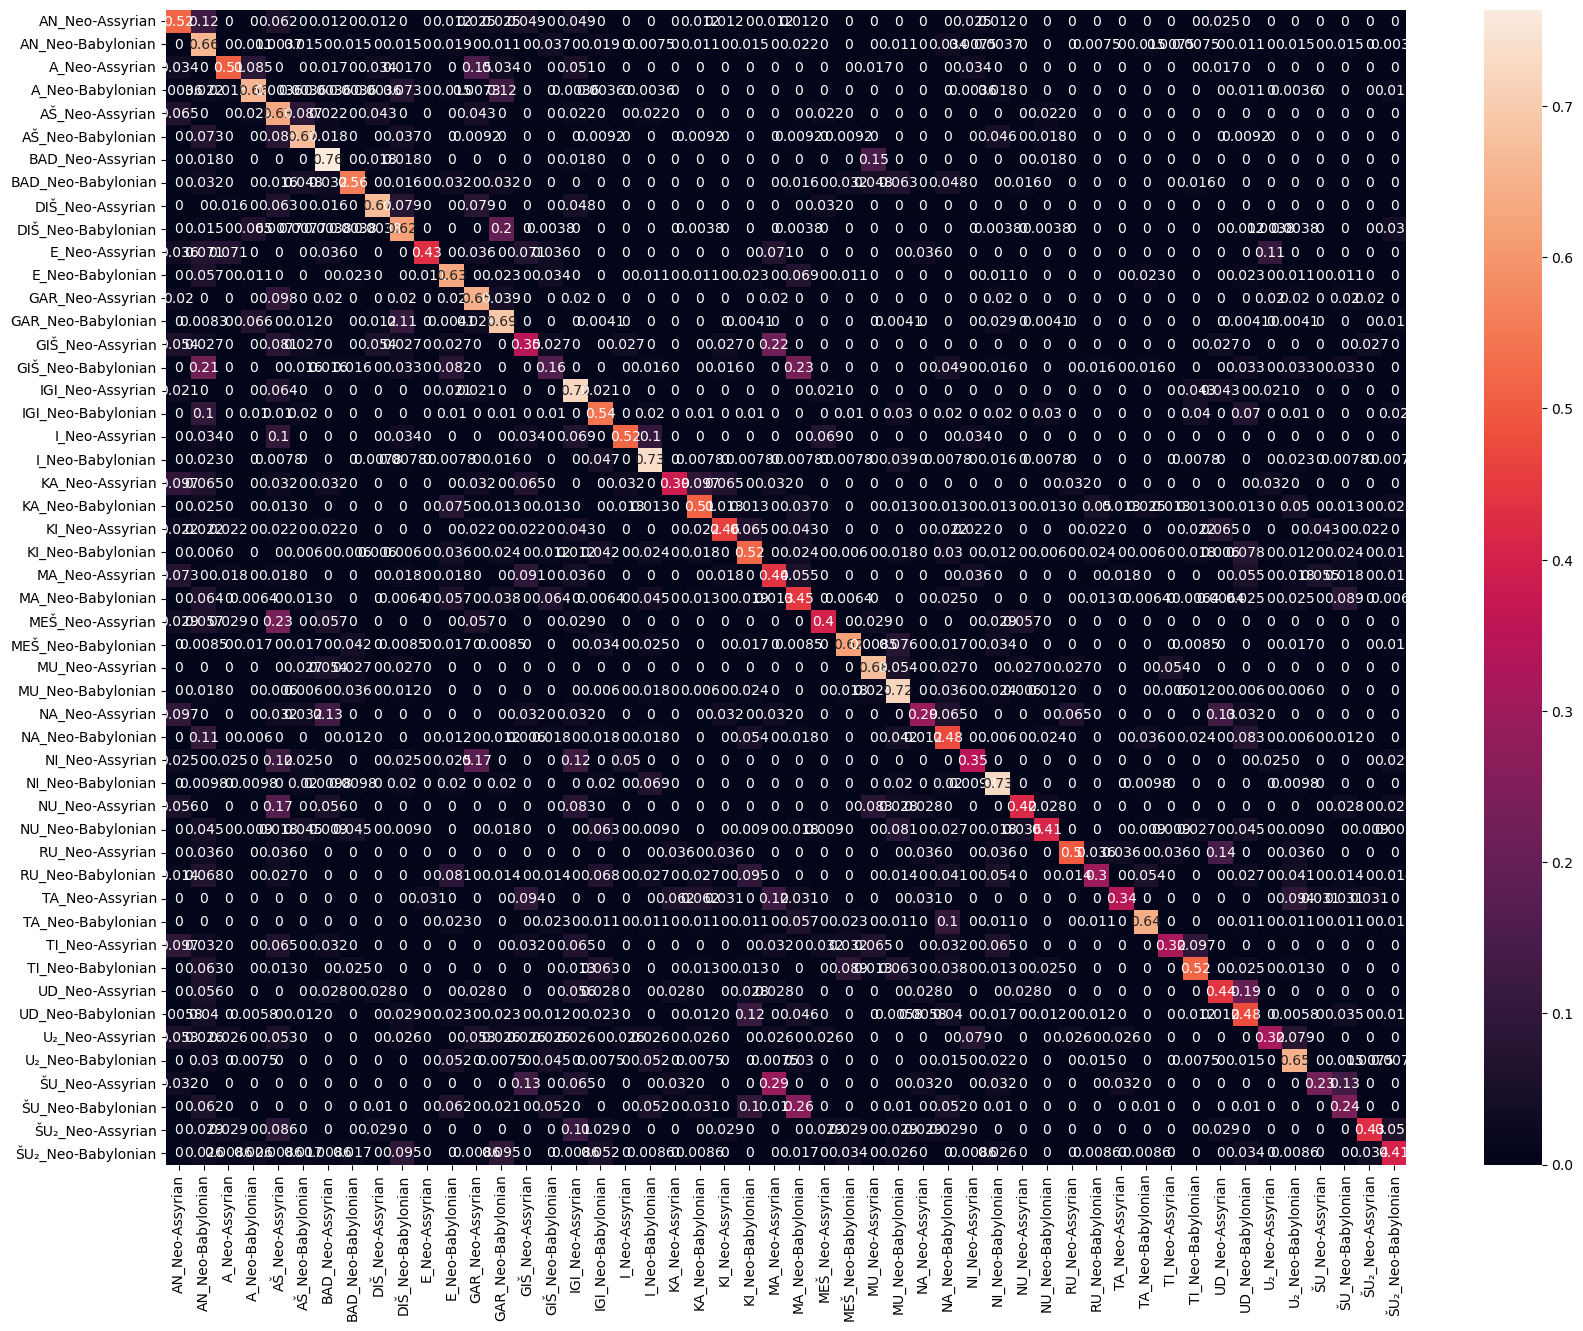

In [14]:
cf_matrix = confusion_matrix(true_values, torch.max(preds,1)[1])
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [idx_to_class[i] for i in idx_to_class],
                    columns = [idx_to_class[i] for i in idx_to_class])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)